- https://realpython.com/defining-your-own-python-function/


- https://realpython.com/python-namespaces-scope/#:~:text=Remove%20ads-,Namespaces%20in%20Python,values%20are%20the%20objects%20themselves.

Things can get weird if you specify a default parameter value that is a mutable object. Consider this Python function definition:

In [21]:
def f(my_list=[]):
    my_list.append('###')
    return my_list

In [22]:
f(['foo', 'bar', 'baz'])

['foo', 'bar', 'baz', '###']

In [23]:
f([1, 2, 3, 4, 5])

[1, 2, 3, 4, 5, '###']

The default value for parameter my_list is the empty list, so if f() is called without any arguments, then the return value is a list with the single element '###':

In [24]:
f()

['###']

Everything makes sense so far. Now, what would you expect to happen if f() is called without any parameters a second and a third time? Let’s see:

In [25]:
f()

['###', '###']

In [26]:
f()

['###', '###', '###']

## In Python, default parameter values are defined only once when the function is defined (that is, when the def statement is executed)!!! 
The default value isn’t re-defined each time the function is called. Thus, each time you call f() without a parameter, you’re performing .append() on the same list.

In [27]:
def f(my_list=[]):
    print(id(my_list))
    my_list.append('###')
    return my_list

In [28]:
f()

2155840692936


['###']

In [29]:
f()

2155840692936


['###', '###']

## LISTS ARE MUTABLE!!

The object identifier displayed confirms that, when my_list is allowed to default, the value is the same object with each call. Since lists are mutable, each subsequent .append() call causes the list to get longer. This is a common and pretty well-documented pitfall when you’re using a mutable object as a parameter’s default value. It potentially leads to confusing code behavior, and is probably best avoided.

As a workaround, consider using a default argument value that signals no argument has been specified. Most any value would work, but None is a common choice. When the sentinel value indicates no argument is given, create a new empty list inside the function:

In [30]:
def f(my_list=None):
    if my_list is None:
        my_list = []
        my_list.append('###')
    return my_list

In [31]:
f()

['###']

In [32]:
f()

['###']

## Pass by value and Pass by reference
- https://realpython.com/defining-your-own-python-function/

- If a variable is passed by value, then the function has a copy to work on, but it can’t modify the original value in the calling environment.
- If a variable is passed by reference, then any changes the function makes to the corresponding parameter will affect the value in the calling environment.

The reason why comes from what a reference means in these languages. Variable values are stored in memory. In Pascal and similar languages, a reference is essentially the address of that memory location, as demonstrated below

Recall that in Python, every piece of data is an object. A reference points to an object, not a specific memory location. That means assignment isn’t interpreted the same way in Python as it is in Pascal. 

In [34]:
x=5
print(id(x))

x=10
print(id(x))  #DIFFERENT!!!!

140707412812304
140707412812464


In [ ]:
# Pascal
x := 5
x := 10

'''
The variable x references a specific memory location.
The first statement puts the value 5 in that location.
The next statement overwrites the 5 and puts 10 there instead.
'''

In [ ]:
# Python
x = 5
x = 10
'''
The first statement causes x to point to an object whose value is 5.
The next statement reassigns x as a new reference to a different object whose value is 10. Stated another way, the second assignment rebinds x to a different object with value 10.
'''

In Python, when you pass an argument to a function, a similar rebinding occurs. Consider this example:

In [36]:
x=5
print(id(x))
def f(x):
    print(id(x)) # THIS IS THE SAME ID!
    x=10
    print(id(x)) # THIS IS DIFFERENT!!!
f(x)

140707412812304
140707412812304
140707412812464


In the main program, the statement x = 5 on line 5 creates a reference named x bound to an object whose value is 5. f() is then called on line 7, with x as an argument. When f() first starts, a new reference called fx is created, which initially points to the same 5 object as x does:

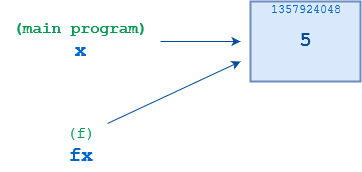

However, when the statement fx = 10 on line 2 is executed, f() rebinds fx to a new object whose value is 10. The two references, x and fx, are uncoupled from one another. Nothing else that f() does will affect x, and when f() terminates, x will still point to the object 5, as it did prior to the function call:

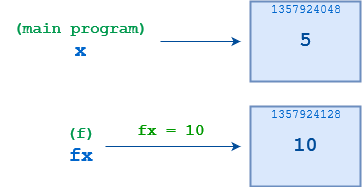

**Argument passing in Python is somewhat of a hybrid between pass-by-value and pass-by-reference. What gets passed to the function is a reference to an object, but the reference is passed by value.**

**Note:** Python’s argument-passing mechanism has been called **pass-by-assignment.** This is because parameter names are bound to objects on function entry in Python, and assignment is also the process of binding a name to an object. You may also see the terms pass-by-object, pass-by-object-reference, or pass-by-sharing.

The key takeaway here is that a Python function can’t change the value of an argument by reassigning the corresponding parameter to something else. The following example demonstrates this:

In [37]:
def f(x):
    x = 'foo'

for i in (
        40,
        dict(foo=1, bar=2),
        {1, 2, 3},
        'bar',
        ['foo', 'bar', 'baz']):
    f(i)
    print(i)

40
{'foo': 1, 'bar': 2}
{1, 2, 3}
bar
['foo', 'bar', 'baz']


Here, objects of type int, dict, set, str, and list are passed to f() as arguments. f() tries to assign each to the string object 'foo', but as you can see, once back in the calling environment, they are all unchanged. As soon as f() executes the assignment x = 'foo', the reference is rebound, and the connection to the original object is lost.

Does that mean a Python function can never modify its arguments at all? Actually, no, that isn’t the case! Watch what happens here:

In this case, the argument to f() is a list. When f() is called, a reference to my_list is passed. You’ve already seen that f() can’t reassign my_list wholesale. If x were assigned to something else, then it would be bound to a different object, and the connection to my_list would be lost.

However, f() can use the reference to make modifications inside my_list. Here, f() has modified the first element. You can see that once the function returns, my_list has, in fact, been changed in the calling environment. The same concept applies to a dictionary:

In [39]:
def f(lst):
    lst[0]=7777777
    
my_list = ['foo', 'bar', 'baz', 'qux']
f(my_list)
my_list

[7777777, 'bar', 'baz', 'qux']

In [41]:
def f(x):
     x['bar'] =123123123131
        
my_dict = {'foo': 1, 'bar': 2, 'baz': 3}
f(my_dict)
my_dict

{'foo': 1, 'bar': 123123123131, 'baz': 3}

In [3]:
x = 20
#print('globals:',globals())
print('global x:', globals()['x'])
def f():
    x=40
    print('locals:',locals())
    #print('globals:',globals())
    print('global x:', globals()['x'])

global x: 20


In [4]:
f()

locals: {'x': 40}
global x: 20


A function can modify an object of mutable type that’s outside its local scope if it modifies the object in place:

In [1]:
lst = [1,2,3,4,5]

def f():
    lst[3]=77777
    
f()
lst

[1, 2, 3, 77777, 5]

In this case, my_list is a list, and lists are mutable. f() can make changes inside my_list even though it’s outside the local scope.

But if f() tries to reassign my_list entirely, then it will create a new local object and won’t modify the global my_list:

In [2]:
lst = [1,2,3,4,5]

def f():
    lst=[322,155,256,3642,9062]
    
f()
lst

[1, 2, 3, 4, 5]

This is similar to what happens when f() tries to modify a mutable function argument.

What if you really do need to modify a value in the global scope from within f()? This is possible in Python using the global declaration:

## GLOBAL

In [10]:
x , y = 20, 30

def f():
    global x, y
    print(x,y)
    x=40
    y= 60
    print(x,y)

In [11]:
f()

20 30
40 60


## NON-LOCAL

In [16]:
def f():
    x=20
    print(locals())
    def g():
        x=40
        print(locals())
    g()
    print(x)
    print(locals())

In [17]:
f()

{'x': 20}
{'x': 40}
20
{'x': 20, 'g': <function f.<locals>.g at 0x000001F5F22B5288>}


In [18]:
def f():
    x=20
    print(locals())
    def g():
        nonlocal x
        x=40
        print(locals())
    g()
    print(x)
    print(locals())

In [19]:
f()

{'x': 20}
{'x': 40}
40
{'x': 40, 'g': <function f.<locals>.g at 0x000001F5F22B51F8>}
